In [2]:
# Bias Variance Trade off

# The bias-variance trade off is the point where we are adding noise/errors by adding model complexity(flexibility)
# The training error goes down as it is, test error starts to go up
# The model after the bias trade off begins to overfit. 

# Doing more complex, caused overfit to our trainig data and cause large errors on new data which is test data

# logistic Regression

In [4]:
# logistic regression for solving classification problems
# binary classification -> 0 / 1

# we can't use a normal linear regression model on binary classification groups. It wont lead a good fit./
# We use sigmoid fun usually

# # Part 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
train = pd.read_csv('titanic_train.csv')

In [8]:
train.head()

# sibsp -> no of siblings
# parch -> parents children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

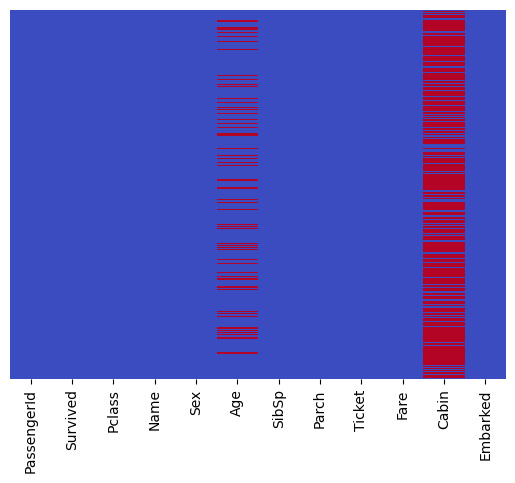

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

In [11]:
# created an heatmap of boolean values T / F values
# Red is null 
# we are missing some age info 
# we are missing a lot of cabin info


In [12]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

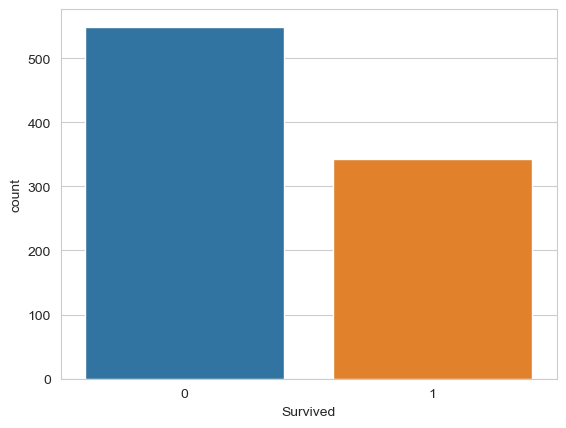

In [13]:
sns.countplot(x = 'Survived', data = train)

In [14]:
# 1 survived o-> not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

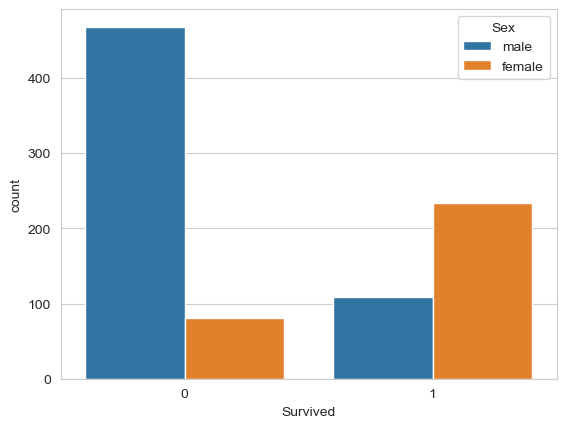

In [15]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

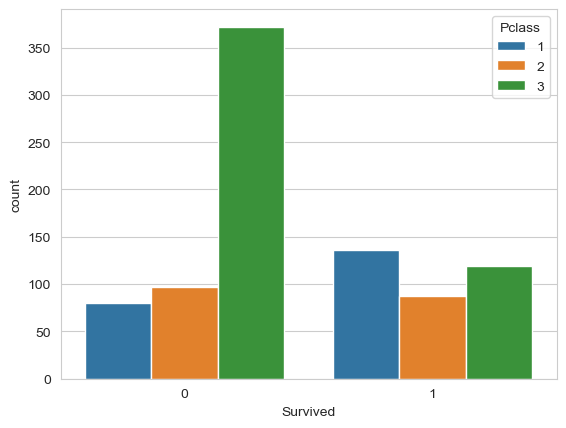

In [16]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

In [17]:
# people who didn't survived is more on 3rd class(green 0)


C:\Users\MONISHA JAIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

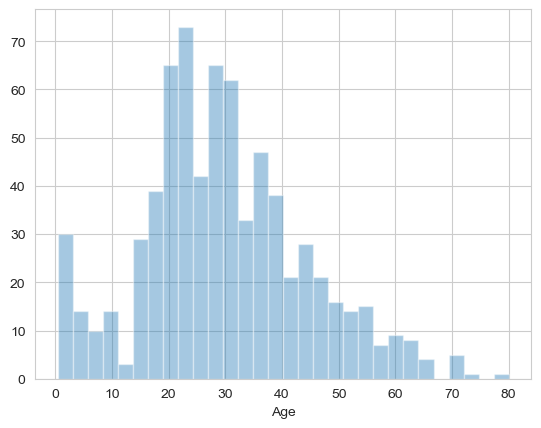

In [18]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:ylabel='Frequency'>

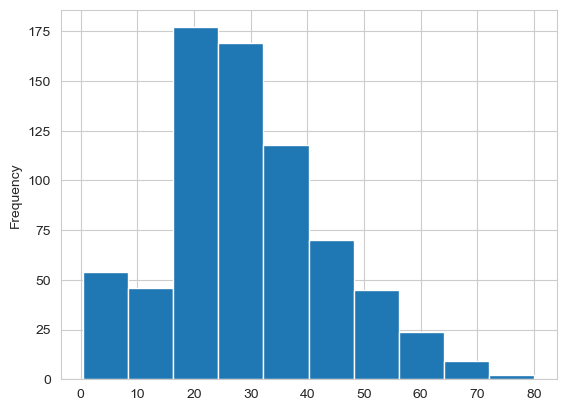

In [19]:
train['Age'].plot.hist() # same

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

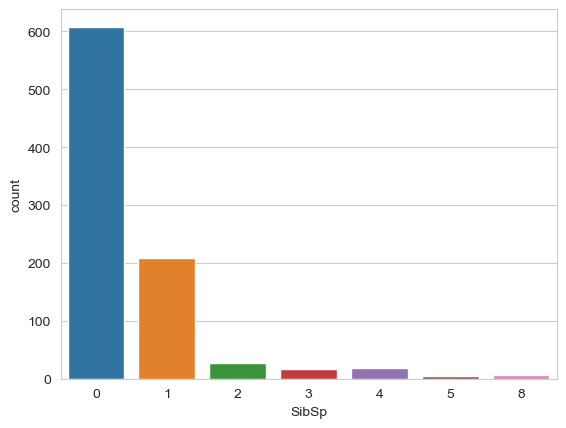

In [21]:
sns.countplot(x = 'SibSp', data = train)

In [22]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

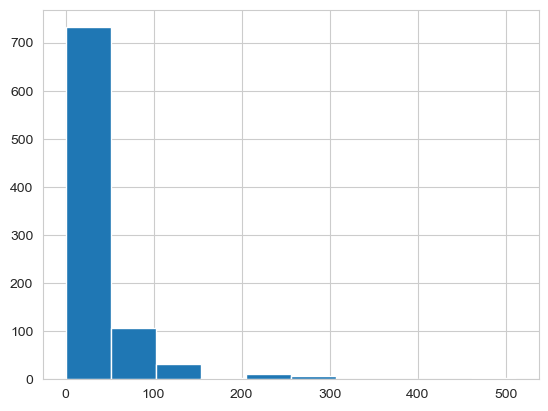

In [23]:
train['Fare'].hist()

<AxesSubplot:>

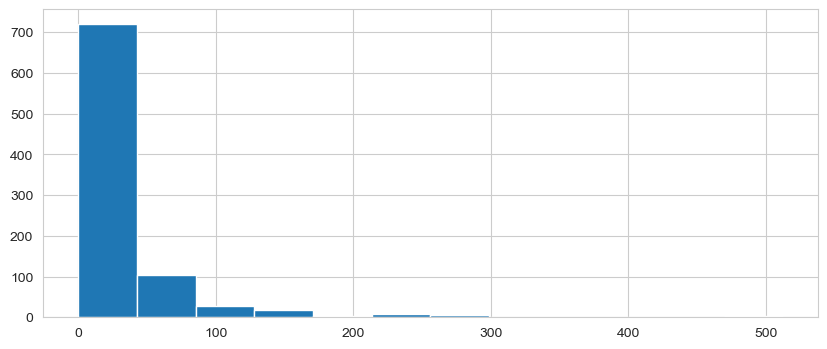

In [25]:
train['Fare'].hist(bins = 12, figsize = (10, 4))

# part 2

In [27]:
# clean the data in a acceptable form

<AxesSubplot:>

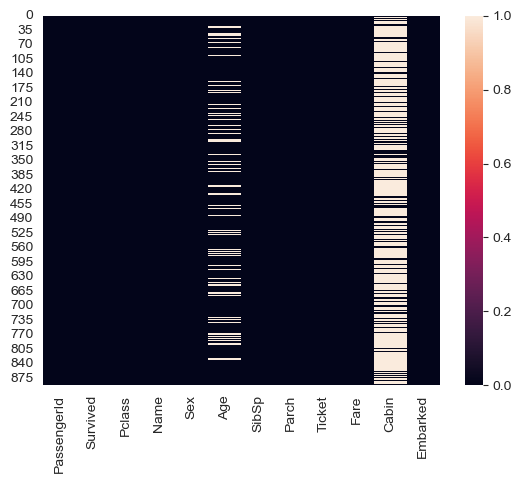

In [28]:
sns.heatmap(train.isnull(), ytic)

In [29]:
# if ticklename = false, dont plot the col names
# cbar -> wheather to draw a color bar

<AxesSubplot:>

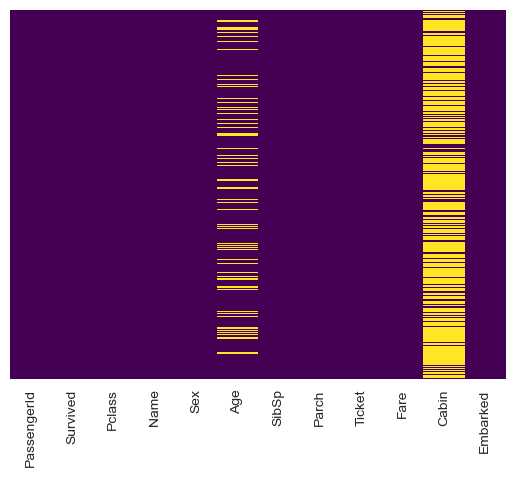

In [31]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [32]:
# take an avg age and fill null age with avg age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

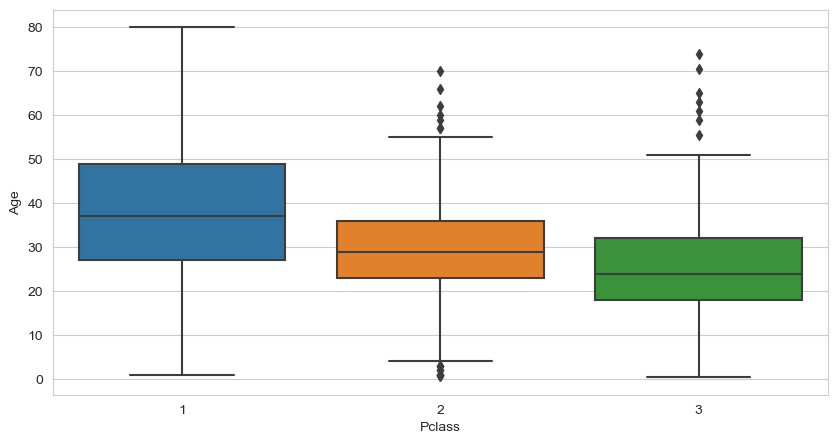

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [35]:
# the passengers in the 1st class is more older than the 2nd and 3rd class

In [36]:
# Writing the function to fill null values of age to avg age values

In [37]:
# 0 -> row,  1 -> cols

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 36
        elif Pclass == 2:
            return 28
        else:
            return 24
    
    else:
        return Age

In [53]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age)

<AxesSubplot:>

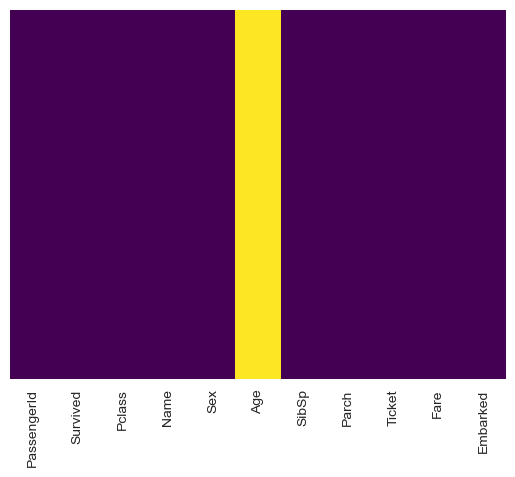

In [54]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [42]:
# So no null age val

In [56]:
train.drop('Cabin', axis = 1, inplace = True)

# axis is 1 coz we are dropping the column not the row

KeyError: "['Cabin'] not found in axis"

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


<AxesSubplot:>

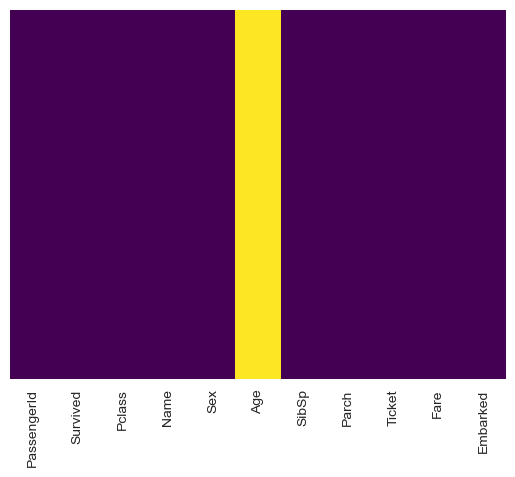

In [58]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [52]:
# inplace -> When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [59]:
# So now we cleaned the data by removing the missing values of 'Cabin' and for null age we have setted avg age


In [61]:
pd.get_dummies(train['Sex'])

# to convert from categorical to numerical (binary classification)
# pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [64]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [65]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [71]:
sexMale = pd.get_dummies(train['Sex'], drop_first = True)

In [72]:
sexMale.head()

,male
0,1
1,0
2,0
3,0
4,1


In [81]:
sexFemale = pd.get_dummies(train['Sex'], drop_first = True)

In [82]:
sexFemale.head()

# if we don't the first, it shows both columns

,male
0,1
1,0
2,0
3,0
4,1


In [76]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [77]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [78]:
# Now adding this new numerical col of sex and embark into the train dataset

In [79]:
train = pd.concat([train, sex, embark], axis = 1)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S,1,0,1


In [83]:
# Now dropping the columns -> Sex and embarked coz we already done it

In [85]:
train.drop(['Sex'], axis = 1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",NaN,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",NaN,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",NaN,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",NaN,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",NaN,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",NaN,0,0,111369,30.0000,C,1,0,0


In [86]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,NaN,1,0,7.2500,1,0,1
1,2,1,1,NaN,1,0,71.2833,0,0,0
2,3,1,3,NaN,0,0,7.9250,0,0,1
3,4,1,1,NaN,1,0,53.1000,0,0,1
4,5,0,3,NaN,0,0,8.0500,1,0,1


In [88]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,NaN,0,0,13.00,1,0,1
887,888,1,1,NaN,0,0,30.00,0,0,1
888,889,0,3,NaN,1,2,23.45,0,0,1
889,890,1,1,NaN,0,0,30.00,1,0,0
890,891,0,3,NaN,0,0,7.75,1,1,0


In [90]:
train.drop('PassengerId', axis = 1, inplace = True)

In [91]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,NaN,1,0,7.2500,1,0,1
1,1,1,NaN,1,0,71.2833,0,0,0
2,1,3,NaN,0,0,7.9250,0,0,1
3,1,1,NaN,1,0,53.1000,0,0,1
4,0,3,NaN,0,0,8.0500,1,0,1


# Part 3

In [92]:
# Train and Test the data

In [93]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,NaN,1,0,7.2500,1,0,1
1,1,1,NaN,1,0,71.2833,0,0,0
2,1,3,NaN,0,0,7.9250,0,0,1
3,1,1,NaN,1,0,53.1000,0,0,1
4,0,3,NaN,0,0,8.0500,1,0,1


In [96]:
test = pd.read_csv('titanic_test.csv')

In [97]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
y = train['Survived']

In [99]:
X = train.drop('Survived', axis=1)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [117]:
from sklearn.linear_model import LogisticRegression

In [124]:
train = np.nan_to_num(X)

In [126]:
train

array([[3., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [3., 0., 0., ..., 1., 1., 0.]])

In [127]:
logmodel = LogisticRegression()

In [116]:
logmodel.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [121]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test, predictions))

NameError: name 'predictions' is not defined

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(y_test, predictions)

NameError: name 'predictions' is not defined